In this chapter, you’ll dive into more advanced data cleaning problems, such as ensuring that weights are all written in kilograms instead of pounds. You’ll also gain invaluable skills that will help you verify that values have been added correctly and that missing values don’t negatively impact your analyses.

## Uniformity

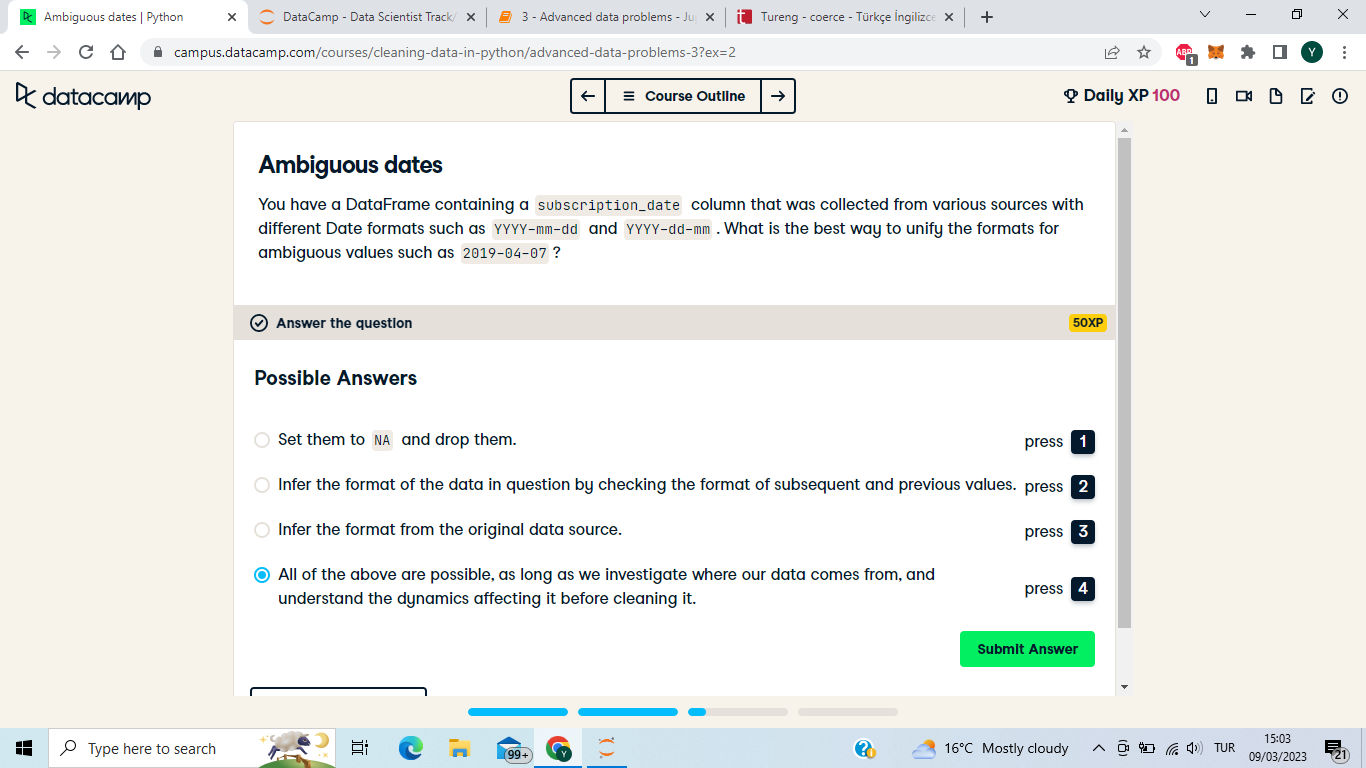

Great work! Like most cleaning data tasks, ambiguous dates require a thorough understanding of where your data comes from. Diagnosing problems is the first step in finding the best solution!

#### Uniform currencies
In this exercise and throughout this chapter, you will be working with a retail banking dataset stored in the banking DataFrame. The dataset contains data on the amount of money stored in accounts (acct_amount), their currency (acct_cur), amount invested (inv_amount), account opening date (account_opened), and last transaction date (last_transaction) that were consolidated from American and European branches.

You are tasked with understanding the average account size and how investments vary by the size of account, however in order to produce this analysis accurately, you first need to unify the currency amount into dollars. The pandas package has been imported as pd, and the banking DataFrame is in your environment.

In [33]:
import pandas as pd
banking = pd.read_csv("banking_dirty.csv")
banking


,Unnamed: 0,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction
0,0,870A9281,1962-06-09,58,63523.31,51295,30105.0,4138.0,1420.0,15632.0,2018-03-05,22-02-19
1,1,166B05B0,1962-12-16,58,38175.46,15050,4995.0,938.0,6696.0,2421.0,28-02-19,31-10-18
2,2,BFC13E88,1990-09-12,34,59863.77,24567,10323.0,4590.0,8469.0,1185.0,January 26 2018,02-04-18
3,3,F2158F66,1985-11-03,35,84132.10,23712,3908.0,492.0,6482.0,12830.0,07-11-17,08-11-18
4,4,7A73F334,1990-05-17,30,120512.00,93230,12158.4,51281.0,13434.0,18383.0,14-05-18,19-07-18
...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,CA507BA1,1974-08-10,46,12209.84,7515,190.0,931.0,1451.0,4943.0,26-05-18,11-09-19
96,96,B99CD662,1989-12-12,31,92838.44,49089,2453.0,7892.0,31486.0,7258.0,04-05-17,12-03-19
97,97,13770971,1984-11-29,36,92750.87,27962,3352.0,7547.0,8486.0,8577.0,16-08-17,24-04-19
98,98,93E78DA3,1969-12-14,51,41942.23,29662,1758.0,11174.0,11650.0,5080.0,09-10-17,15-04-18


In [34]:
'''
# Find values of acct_cur that are equal to 'euro'
acct_eu = banking['acct_cur'] == 'euro'

# Convert acct_amount where it is in euro to dollars
banking.loc[acct_eu, 'acct_amount'] = banking.loc[acct_eu, 'acct_amount'] * 1.1 

# Unify acct_cur column by changing 'euro' values to 'dollar'
banking.loc[acct_eu, 'acct_cur'] = 'dollar'

# Assert that only dollar currency remains
assert banking['acct_cur'].unique() == 'dollar'
'''

"\n# Find values of acct_cur that are equal to 'euro'\nacct_eu = banking['acct_cur'] == 'euro'\n\n# Convert acct_amount where it is in euro to dollars\nbanking.loc[acct_eu, 'acct_amount'] = banking.loc[acct_eu, 'acct_amount'] * 1.1 \n\n# Unify acct_cur column by changing 'euro' values to 'dollar'\nbanking.loc[acct_eu, 'acct_cur'] = 'dollar'\n\n# Assert that only dollar currency remains\nassert banking['acct_cur'].unique() == 'dollar'\n"

#### Uniform dates
After having unified the currencies of your different account amounts, you want to add a temporal dimension to your analysis and see how customers have been investing their money given the size of their account over each year. The account_opened column represents when customers opened their accounts and is a good proxy for segmenting customer activity and investment over time.

However, since this data was consolidated from multiple sources, you need to make sure that all dates are of the same format. You will do so by converting this column into a datetime object, while making sure that the format is inferred and potentially incorrect formats are set to missing. The banking DataFrame is in your environment and pandas was imported as pd.

In [35]:
# Print the header of account_opened
print(banking["account_opened"].head())

0         2018-03-05
1           28-02-19
2    January 26 2018
3           07-11-17
4           14-05-18
Name: account_opened, dtype: object


#### Question
Take a look at the output. You tried converting the values to datetime using the default to_datetime() function without changing any argument, however received the following error:

ValueError: month must be in 1..12

Why do you think that is?

a.The to_datetime() function needs to be explicitly told which date format each row is in.<br>
b.The to_datetime() function can only be applied on YY-mm-dd date formats.<br>
<strong>c.The 21-14-17 entry is erroneous and leads to an error.</strong>

In [36]:
# Print the header of account_opened
print(banking['account_opened'].head(),"\n\n\n")

# Convert account_opened to datetime
banking['account_opened'] = pd.to_datetime(banking['account_opened'],
                                           # Infer datetime format
                                           infer_datetime_format = True,
                                           # Return missing value for error
                                           errors = 'coerce') 

print(banking['account_opened'].head())

0         2018-03-05
1           28-02-19
2    January 26 2018
3           07-11-17
4           14-05-18
Name: account_opened, dtype: object 



0   2018-03-05
1   2019-02-28
2   2018-01-26
3   2017-07-11
4   2018-05-14
Name: account_opened, dtype: datetime64[ns]


In [37]:
# Print the header of account_opend
print(banking['account_opened'].head(), "\n\n")

# Convert account_opened to datetime
banking['account_opened'] = pd.to_datetime(banking['account_opened'],
                                           # Infer datetime format
                                           infer_datetime_format = True,
                                           # Return missing value for error
                                           errors = 'coerce') 

# Get year of account opened
banking['acct_year'] = banking['account_opened'].dt.strftime('%Y')

# Print acct_year
print(banking['acct_year'])

0   2018-03-05
1   2019-02-28
2   2018-01-26
3   2017-07-11
4   2018-05-14
Name: account_opened, dtype: datetime64[ns] 


0     2018
1     2019
2     2018
3     2017
4     2018
      ... 
95    2018
96    2017
97    2017
98    2017
99    2017
Name: acct_year, Length: 100, dtype: object


## Cross field validation
#### Cross field or no cross field?

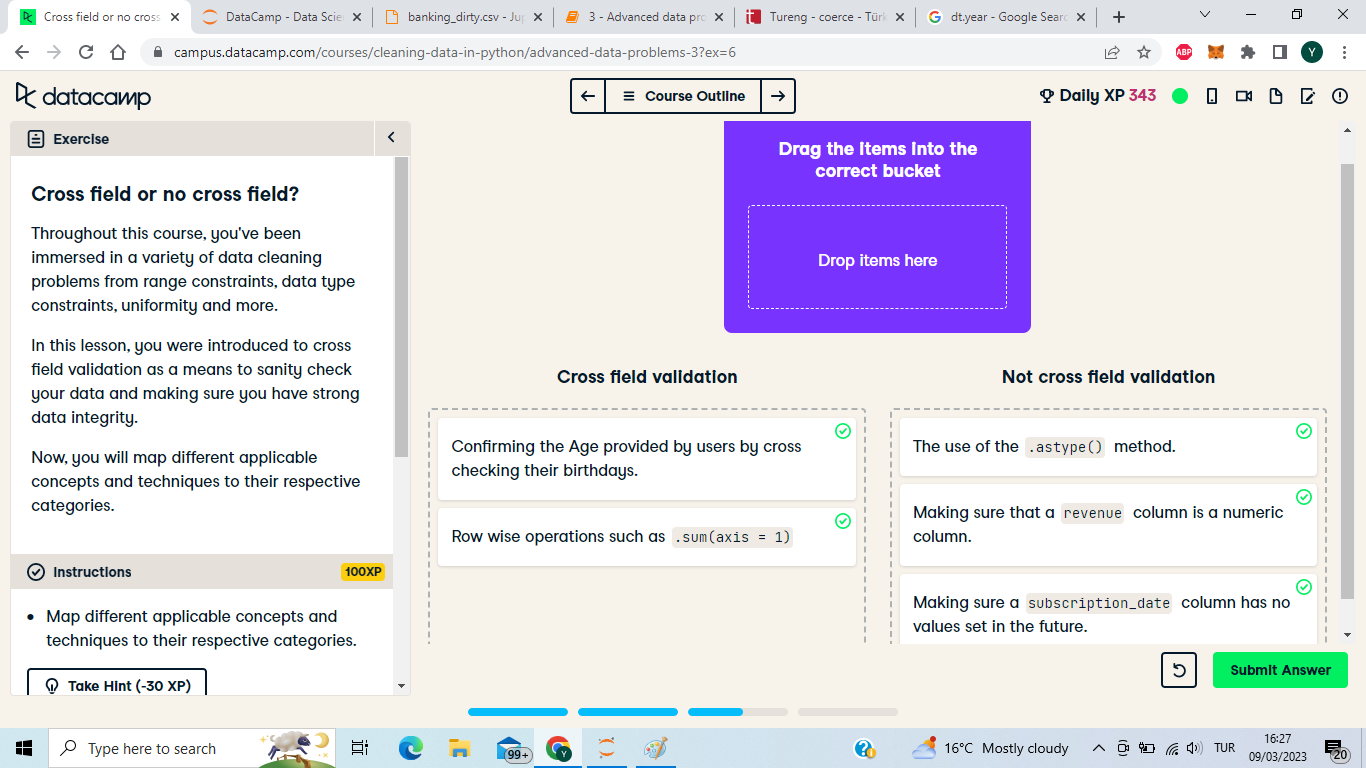

Awesome work! In the next couple of exercises, you'll be seeing some of these techniques in action!

#### How's our data integrity?
New data has been merged into the banking DataFrame that contains details on how investments in the inv_amount column are allocated across four different funds A, B, C and D.

Furthermore, the age and birthdays of customers are now stored in the age and birth_date columns respectively.

You want to understand how customers of different age groups invest. However, you want to first make sure the data you're analyzing is correct. You will do so by cross field checking values of inv_amount and age against the amount invested in different funds and customers' birthdays. Both pandas and datetime have been imported as pd and dt respectively.

In [38]:
# Store fund columns to sum against
fund_columns = ['fund_A', 'fund_B', 'fund_C', 'fund_D']

# Find rows where fund_columns row sum == inv_amount
inv_equ = banking[fund_columns].sum(axis = 1) == banking["inv_amount"]

# Store consistent and inconsistent data
consistent_inv = banking[inv_equ]
inconsistent_inv = banking[~inv_equ]

# Store consistent and inconsistent data
print("Number of inconsistent investments: ", inconsistent_inv.shape[0])

Number of inconsistent investments:  8


In [54]:
from datetime import date as dt
# Store today's date and find ages
today = dt.today()

# Convert account_opened to datetime
banking['birth_date'] = pd.to_datetime(banking['birth_date'],
                                           # Infer datetime format
                                           infer_datetime_format = True,
                                           # Return missing value for error
                                           errors = 'coerce') 

banking["birth_year"] = banking["birth_date"].dt.strftime('%Y')
ages_manual = today.year - banking["birth_date"].dt.year
print(ages_manual, "\n\n")

# Find rows where age column == ages_manual
age_equ = banking["Age"] == ages_manual
print(banking["Age"])

# Store consistent and inconsistent data
consistent_ages = banking[age_equ]
inconsistent_ages = banking[~age_equ]

# Store consistent and inconsistent data
print("Number of inconsistent ages: ", inconsistent_ages.shape[0])

0     61
1     61
2     33
3     38
4     33
      ..
95    49
96    34
97    39
98    54
99    30
Name: birth_date, Length: 100, dtype: int64 


0     58
1     58
2     34
3     35
4     30
      ..
95    46
96    31
97    36
98    51
99    27
Name: Age, Length: 100, dtype: int64
Number of inconsistent ages:  100


## Completeness
#### Is this missing at random?

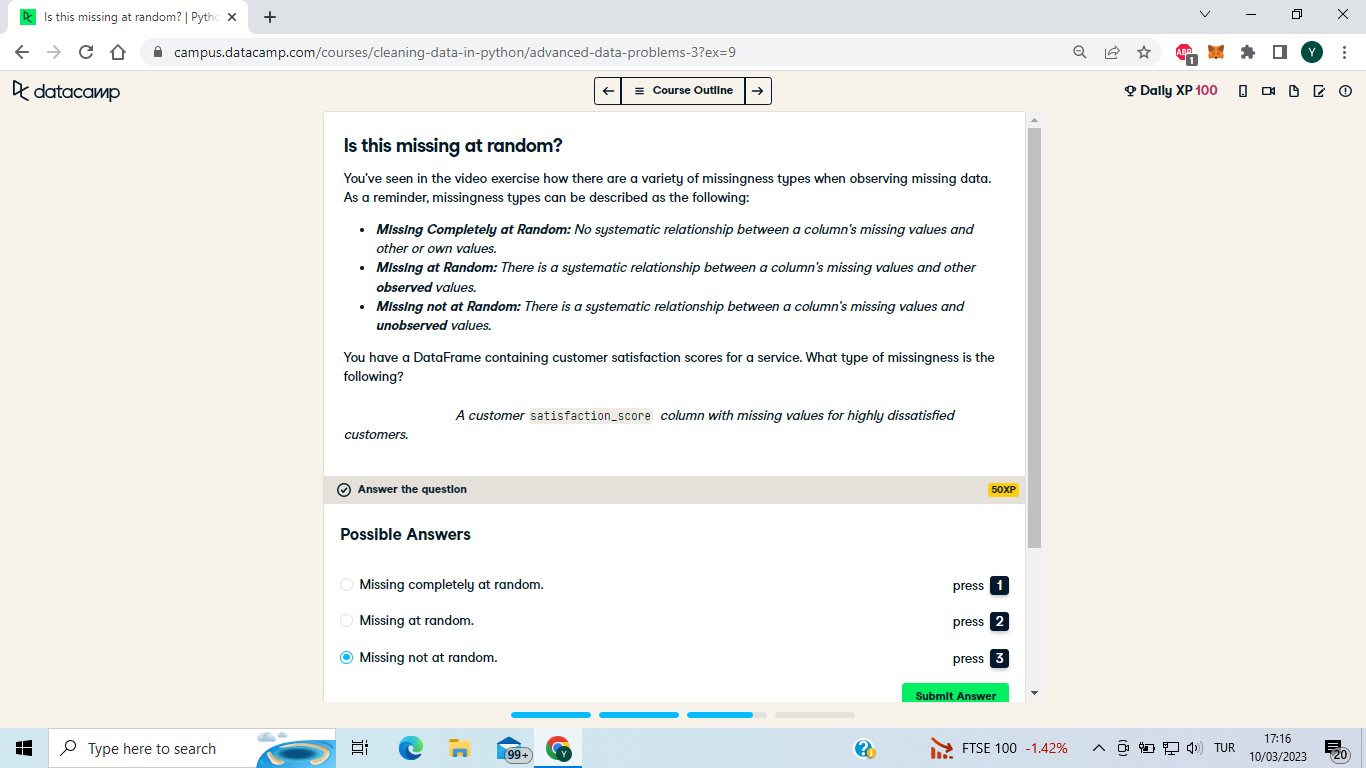

Awesome work! This is a clear example of missing not at random, where low values of satisfaction_score are missing because of inherently low satisfaction!

#### Missing investors
Dealing with missing data is one of the most common tasks in data science. There are a variety of types of missingness, as well as a variety of types of solutions to missing data.

You just received a new version of the banking DataFrame containing data on the amount held and invested for new and existing customers. However, there are rows with missing inv_amount values.

You know for a fact that most customers below 25 do not have investment accounts yet, and suspect it could be driving the missingness. The pandas, missingno and matplotlib.pyplot packages have been imported as pd, msno and plt respectively. The banking DataFrame is in your environment.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno

banking = pd.read_csv("banking_dirty-Copy1.csv")
banking

,Unnamed: 0,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction
0,0,870A9281,1962-06-09,58,63523.31,51295.0,30105.0,4138.0,1420.0,15632.0,2018-03-05,22-02-19
1,1,166B05B0,1962-12-16,58,38175.46,15050.0,4995.0,938.0,6696.0,2421.0,28-02-19,31-10-18
2,2,BFC13E88,1990-09-12,34,59863.77,24567.0,10323.0,4590.0,8469.0,1185.0,January 26 2018,02-04-18
3,3,F2158F66,1985-11-03,35,84132.10,NaN,3908.0,492.0,6482.0,12830.0,07-11-17,08-11-18
4,4,7A73F334,1990-05-17,30,120512.00,93230.0,12158.4,51281.0,13434.0,18383.0,14-05-18,19-07-18
...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,CA507BA1,1974-08-10,46,12209.84,7515.0,190.0,931.0,1451.0,4943.0,26-05-18,11-09-19
96,96,B99CD662,1989-12-12,31,92838.44,49089.0,2453.0,7892.0,31486.0,7258.0,04-05-17,12-03-19
97,97,13770971,1984-11-29,36,92750.87,27962.0,3352.0,7547.0,8486.0,8577.0,16-08-17,24-04-19
98,98,93E78DA3,1969-12-14,51,41942.23,29662.0,1758.0,11174.0,11650.0,5080.0,09-10-17,15-04-18


Unnamed: 0          0
cust_id             0
birth_date          0
Age                 0
acct_amount         0
inv_amount          3
fund_A              0
fund_B              0
fund_C              0
fund_D              0
account_opened      0
last_transaction    0
dtype: int64


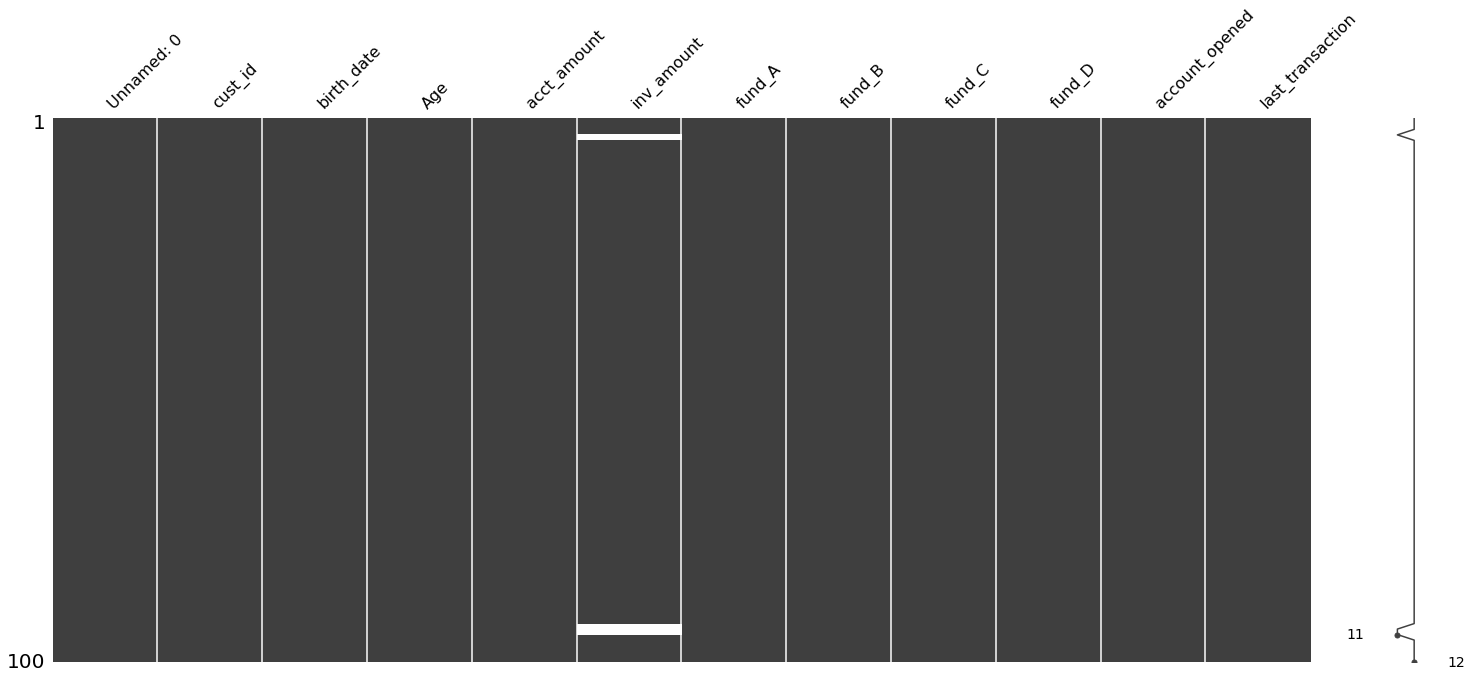

In [5]:
# Print number of missing values in banking
print(banking.isna().sum())

# Visualize missingness matrix
msno.matrix(banking)
plt.show()

In [7]:
# Isolate missing and non missing values of inv_amount
missing_investors = banking[banking["inv_amount"].isna()]
investors = banking[~banking["inv_amount"].isna()]

print(missing_investors.describe(), "\n\n")
print(investors.describe())

       Unnamed: 0        Age  acct_amount  inv_amount       fund_A  \
count    3.000000   3.000000      3.00000         0.0      3.00000   
mean    63.333333  50.333333  90497.08000         NaN   5901.00000   
std     52.252592  13.316656   5760.36603         NaN   5444.33366   
min      3.000000  35.000000  84132.10000         NaN   1734.00000   
25%     48.000000  46.000000  88069.61000         NaN   2821.00000   
50%     93.000000  57.000000  92007.12000         NaN   3908.00000   
75%     93.500000  58.000000  93679.57000         NaN   7984.50000   
max     94.000000  59.000000  95352.02000         NaN  12061.00000   

             fund_B        fund_C        fund_D  
count      3.000000      3.000000      3.000000  
mean    9666.333333  15147.666667  12561.333333  
std     8083.435305  17894.248080   8113.336942  
min      492.000000   3236.000000   4317.000000  
25%     6628.500000   4859.000000   8573.500000  
50%    12765.000000   6482.000000  12830.000000  
75%    14253.500000

Question
Now that you've isolated banking into investors and missing_investors, use the .describe() method on both of these DataFrames in the IPython shell to understand whether there are structural differences between them. What do you think is going on?

a.The data is missing completely at random and there are no drivers behind the missingness.<br>
<strong>b.The inv_amount is missing only for young customers, since the average age in missing_investors is 22 and the maximum age is 25.</strong><br>
c.The inv_amount is missing only for old customers, since the average age in missing_investors is 42 and the maximum age is 59.



Datacamptaki kurstaki değerlere göre bu cevap doğru burdaki datasette ben random değer atadım.

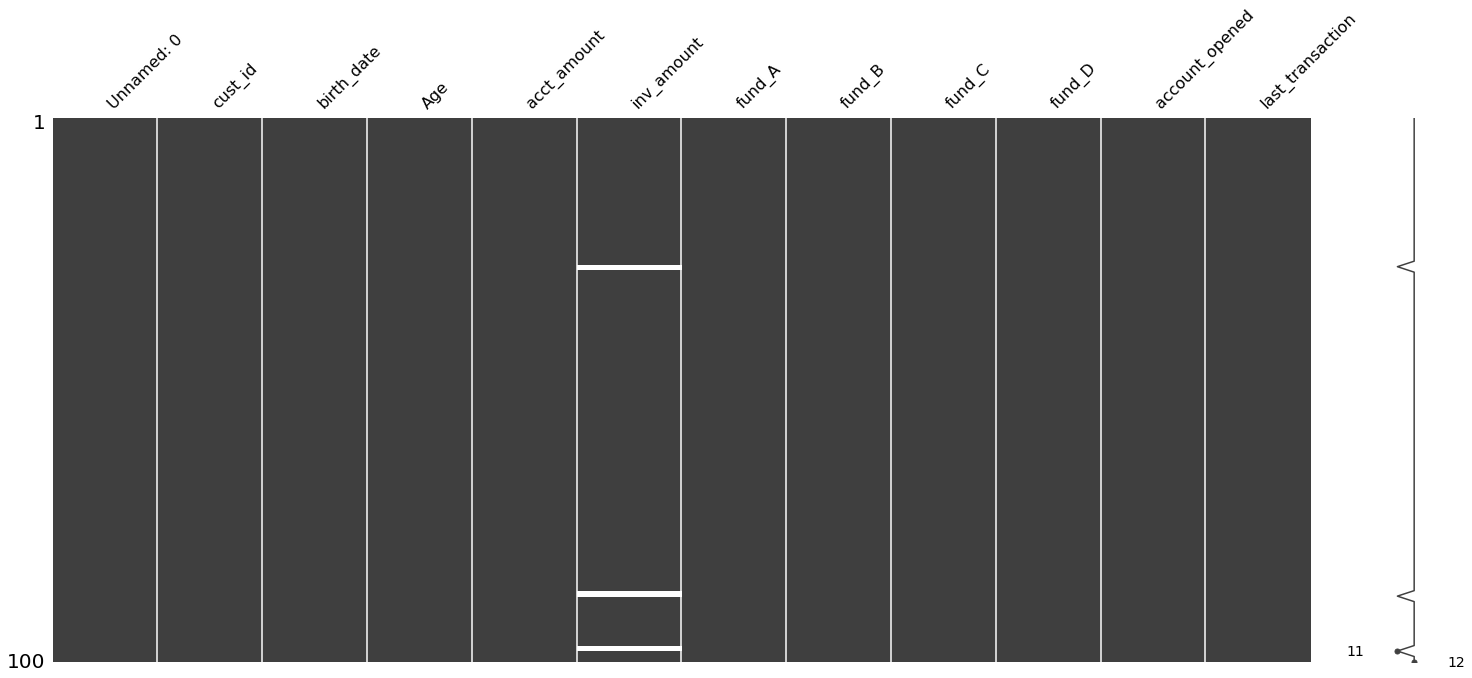

In [10]:

# Sort banking by age and visualize
banking_sorted = banking.sort_values("Age")
msno.matrix(banking_sorted)
plt.show()

Great job! Notice how all the white spaces for inv_amount are on top? Indeed missing values are only due to young bank account holders not investing their money! Better set it to 0 with .fillna().

#### Follow the money
In this exercise, you're working with another version of the banking DataFrame that contains missing values for both the cust_id column and the acct_amount column.

You want to produce analysis on how many unique customers the bank has, the average amount held by customers and more. You know that rows with missing cust_id don't really help you, and that on average acct_amount is usually 5 times the amount of inv_amount.

In this exercise, you will drop rows of banking with missing cust_ids, and impute missing values of acct_amount with some domain knowledge.

In [11]:
banking2 = pd.read_csv("banking_dirty-Copy2.csv")

# Drop missing values of cust_id
banking_fullid = banking2.dropna(subset = ['cust_id'])

# Compute estimated acct_amount
acct_imp = banking_fullid["inv_amount"] * 5

# Impute missing acct_amount with corresponding acct_imp
banking_imputed = banking_fullid.fillna({'acct_amount':acct_imp})

# Print number of missing values
print(banking_imputed.isna().sum())

Unnamed: 0          0
cust_id             0
birth_date          0
Age                 0
acct_amount         0
inv_amount          0
fund_A              0
fund_B              0
fund_C              0
fund_D              0
account_opened      0
last_transaction    0
dtype: int64


Awesome work! As you can see no missing data left, you can definitely _bank_ on getting your analysis right!